In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data.xlsx')
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x1000,Alistair Barrf,17.375000,913-74-1218,Lawyer,30625.940,2706.161667,6.0,5.0,27,...,Bad,1562.91,33.477546,10.458333,Yes,42.941090,158.549735,High_spent_Medium_value_payments,335.375341,0
1,CUS_0x1009,Arunah,25.750000,063-67-6938,Mechanic,52312.680,4250.390000,6.0,5.0,17,...,Standard,202.68,29.839984,30.714286,Yes,108.366467,146.679378,High_spent_Medium_value_payments,428.743155,1
2,CUS_0x100b,Shirboni,18.500000,238-62-0395,Media_Manager,113781.390,9549.782500,1.0,4.0,1,...,Good,1030.20,34.841449,15.571429,No,0.000000,505.386526,High_spent_Large_value_payments,781.229776,0
3,CUS_0x1011,Schneyerh,43.875000,793-05-8223,Doctor,58918.470,5208.872500,3.0,3.0,17,...,Standard,473.14,27.655897,15.541667,Yes,123.434939,311.060914,Low_spent_Medium_value_payments,332.642837,1
4,CUS_0x1013,Cameront,43.750000,930-49-9615,Mechanic,98620.980,7962.415000,3.0,3.0,6,...,Good,1233.51,31.933940,17.535714,No,228.018084,355.442408,High_spent_Medium_value_payments,472.781009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,Somervilled,55.000000,726-35-5322,Scientist,17032.785,1176.398750,0.0,6.0,2,...,Good,1229.08,32.889398,17.000000,No,33.299764,83.918549,Low_spent_Small_value_payments,271.671562,1
12496,CUS_0xff4,Poornimaf,36.857143,655-05-7666,Entrepreneur,25546.260,2415.855000,8.0,7.0,14,...,Standard,758.44,32.598257,18.440476,Yes,101.328637,152.775690,Low_spent_Small_value_payments,259.981173,1
12497,CUS_0xff6,Shieldsb,18.625000,541-92-8371,Doctor,117639.920,9727.326667,5.0,6.0,1,...,Good,338.30,33.258053,24.625000,No,126.638453,655.228203,High_spent_Small_value_payments,667.322417,1
12498,CUS_0xffc,Brads,17.375000,226-86-7294,Musician,60877.170,5218.097500,6.0,8.0,27,...,Bad,1300.13,34.722108,12.861111,Yes,272.809169,156.172974,High_spent_Large_value_payments,339.951771,0


In [4]:
df['Credit_Score'].unique()

array([0, 1, 2], dtype=int64)

In [5]:
def corr_matrix_heat_map(df, fig_width, fig_height):
    corr_matrix = df.corr(numeric_only=True)
    for i in range(len(corr_matrix.index)):
        for j in range(i, len(corr_matrix.columns)):
            corr_matrix.loc[corr_matrix.index[i], corr_matrix.columns[j]] = np.nan
    plt.figure(figsize=(fig_width, fig_height))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_matrix, cmap=cmap, vmin=-1, vmax=1, annot=True)

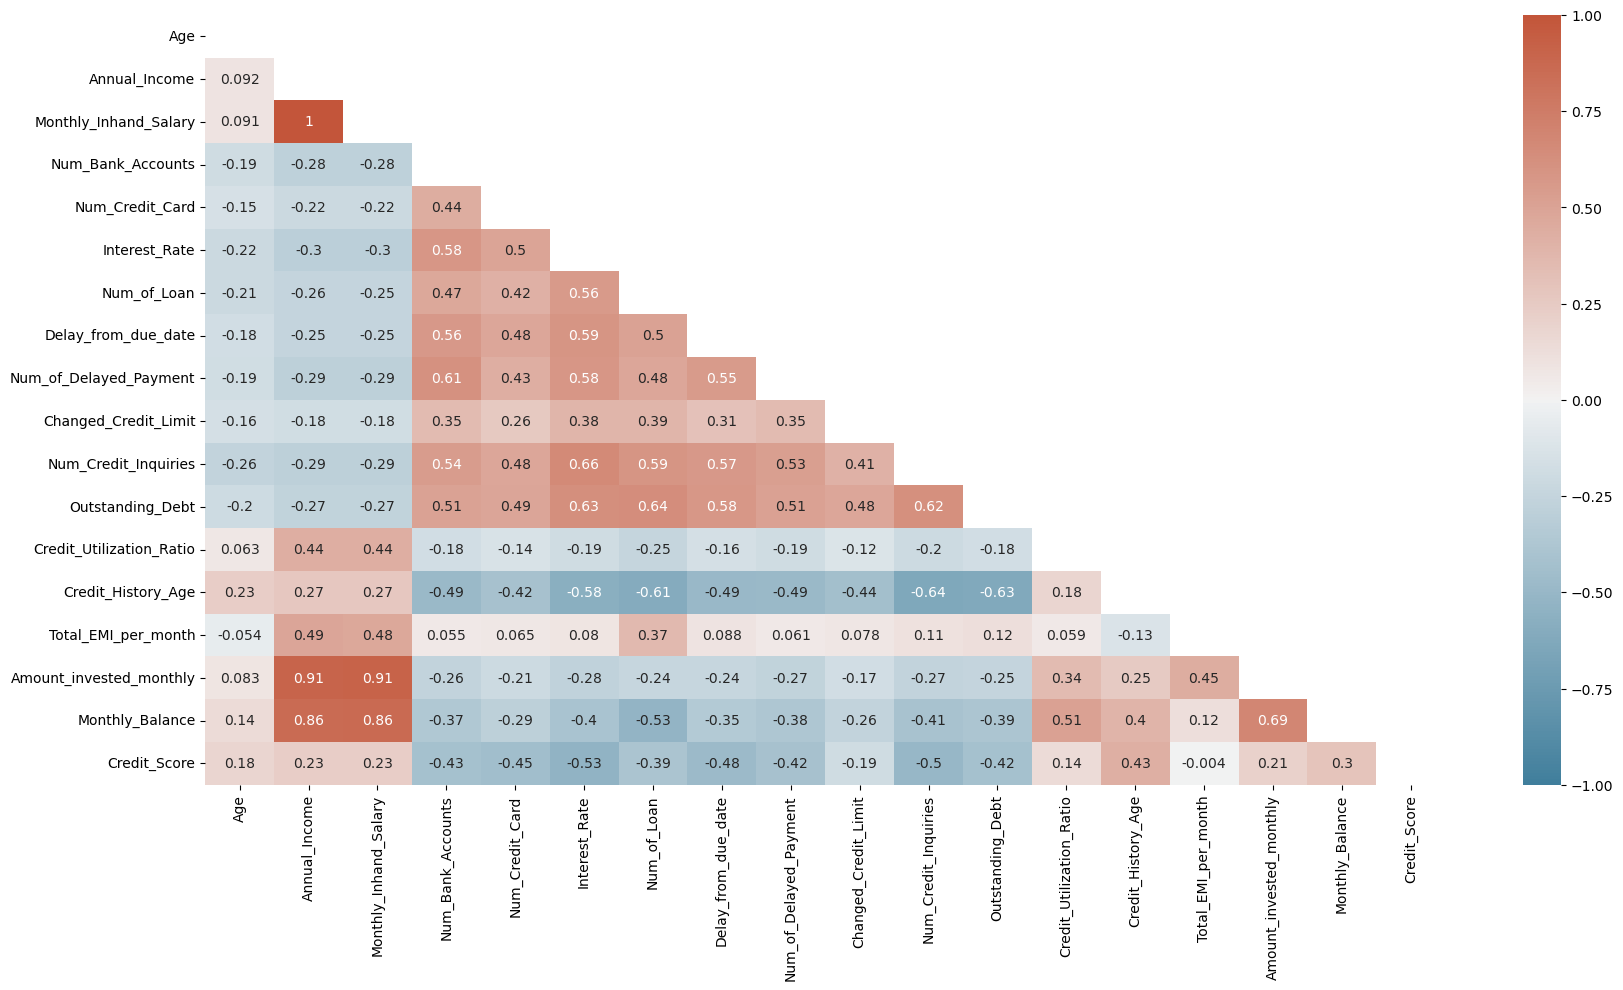

In [6]:
corr_matrix_heat_map(df, 20, 10)

Text(0, 0.5, 'Count')

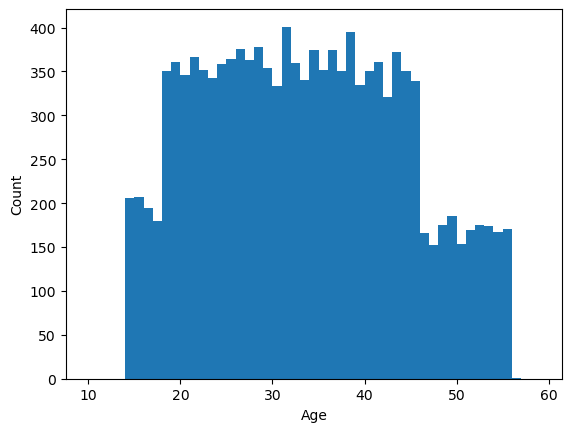

In [7]:
bins = np.arange(10, 60, 1)
plt.hist(df["Age"], bins=bins)
plt.xlabel("Age")
plt.ylabel("Count")

(10.0, 60.0)

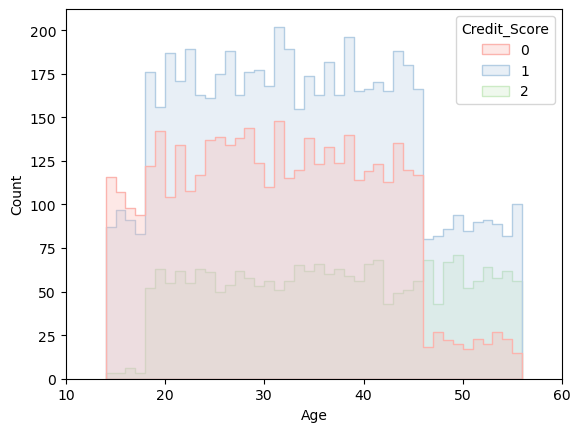

In [8]:
sns.histplot(data=df, x="Age", hue="Credit_Score", binwidth=1, alpha=0.3, element="step", palette="Pastel1")
plt.xlim(10,60)

(10.0, 60.0)

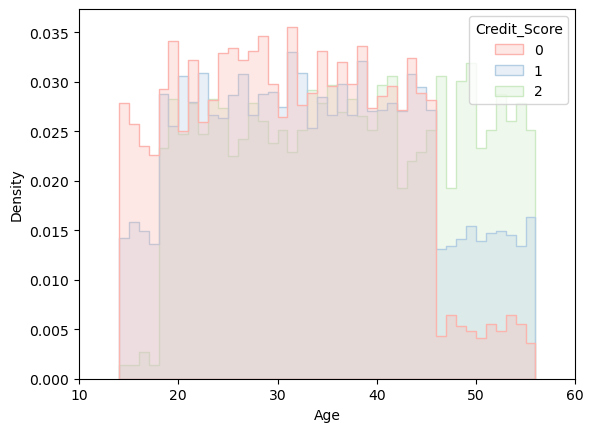

In [9]:
sns.histplot(data=df, x="Age", hue="Credit_Score", binwidth=1, stat="density", common_norm=False, alpha=0.3, element="step", palette="Pastel1")
plt.xlim(10,60)

(10.0, 60.0)

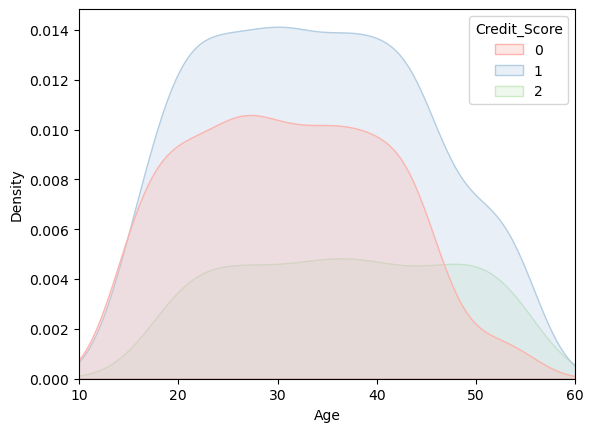

In [10]:
sns.kdeplot(data=df, x="Age", hue="Credit_Score", bw_adjust=1.5, fill=True, alpha=0.3, palette="Pastel1")
plt.xlim(10,60)

(10.0, 60.0)

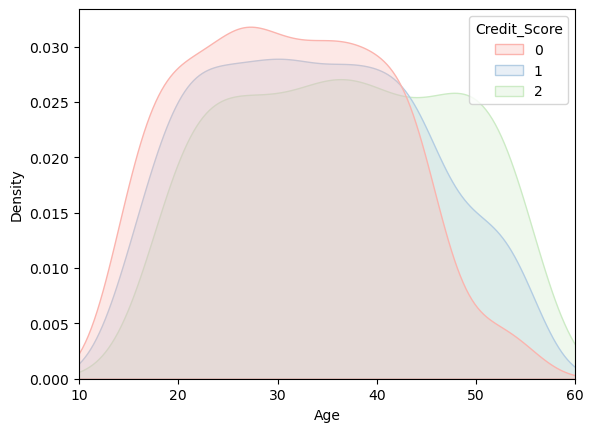

In [11]:
sns.kdeplot(data=df, x="Age", hue="Credit_Score", common_norm=False, bw_adjust=1.5, fill=True, alpha=0.3, palette="Pastel1")
plt.xlim(10,60)

<Axes: xlabel='Payment_of_Min_Amount', ylabel='Count'>

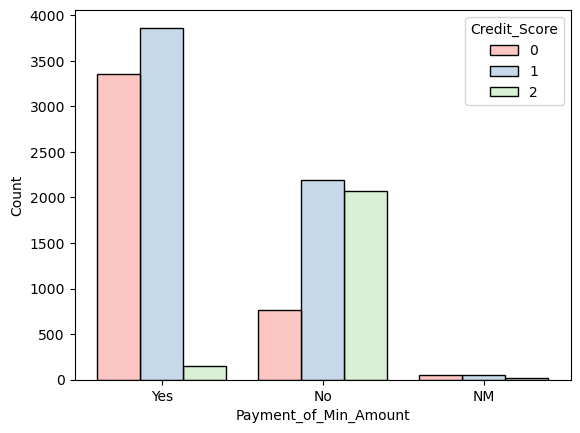

In [12]:
sns.histplot(data=df, x="Payment_of_Min_Amount", hue="Credit_Score", multiple="dodge", shrink=0.8, palette="Pastel1")

(0.0, 1.0)

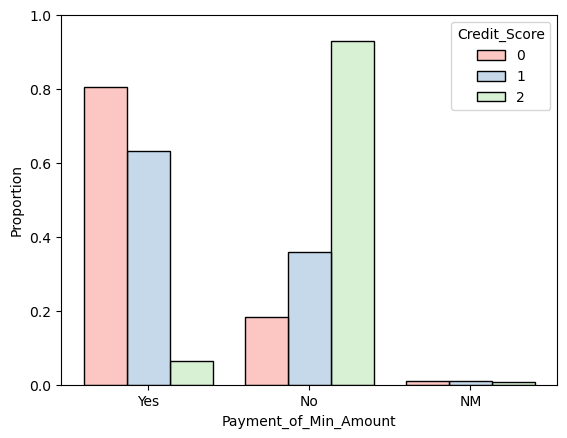

In [13]:
sns.histplot(data=df, x="Payment_of_Min_Amount", hue="Credit_Score", stat="proportion", common_norm=False, multiple="dodge", shrink=0.8, palette="Pastel1")
plt.ylim(0,1)

(0.0, 30.0)

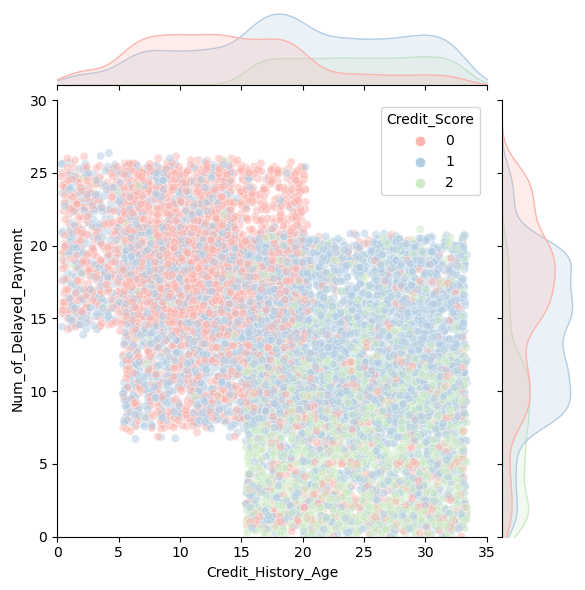

In [14]:
sns.jointplot(data=df, x="Credit_History_Age", y="Num_of_Delayed_Payment", hue="Credit_Score", kind='scatter', alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,30)

(0.0, 30.0)

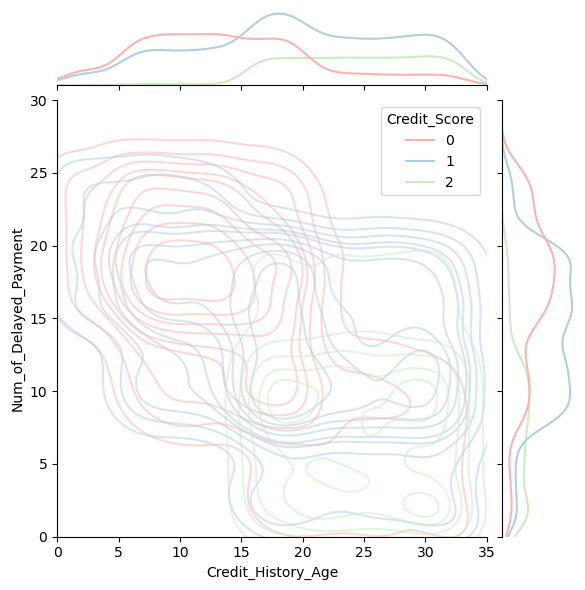

In [15]:
sns.jointplot(data=df, x="Credit_History_Age", y="Num_of_Delayed_Payment", hue="Credit_Score", kind='kde', alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,30)

(0.0, 30.0)

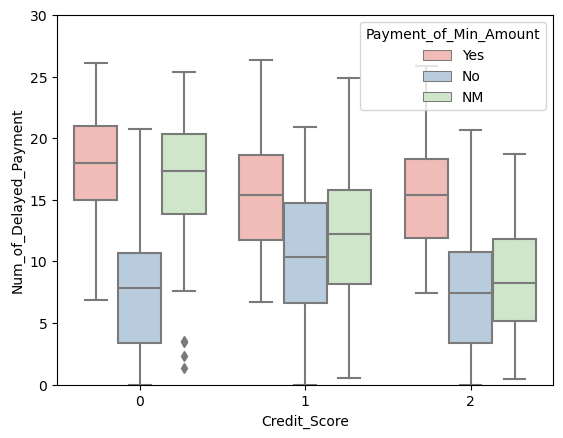

In [16]:
sns.boxplot(data=df, x="Credit_Score", y="Num_of_Delayed_Payment", hue="Payment_of_Min_Amount", palette="Pastel1")
plt.ylim(0,30)

(0.0, 30.0)

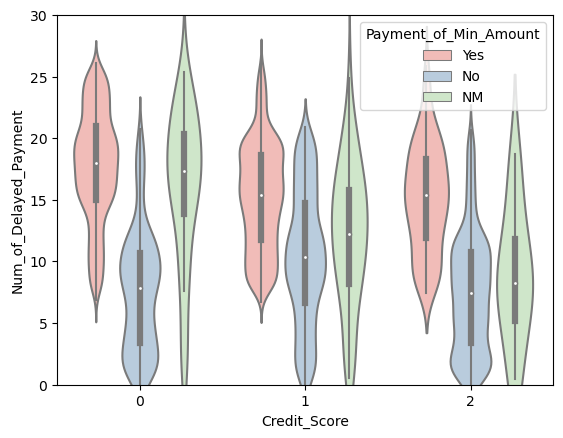

In [17]:
sns.violinplot(data=df, x="Credit_Score", y="Num_of_Delayed_Payment", hue="Payment_of_Min_Amount", palette="Pastel1")
plt.ylim(0,30)